## Linear Regression Analysis of Wood Decomposition

In this notebook, we explore the relationship between the final weight of wood blocks and their decomposition rate, represented by the `k_value`. We will use linear regression, a fundamental technique in machine learning, to model and predict this relationship. We will focus on Australia for this analysis. 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


# Load the dataset
df = pd.read_csv(r'C:\Users\isabe\INDE 577\INDE-577\global_termite_microbe_wd.csv')

# Filter the data for a specific country
country_name = 'Australia'
country_data = df[df['country'] == country_name]

## Data Exploration and Preprocessing

First, we load the termite dataset into a pandas DataFrame. This dataset includes various features, but for our linear regression analysis, we will particularly focus on `final_wt` and `k_value` for the sites in Australia.
It's crucial to preprocess this data by handling any missing values and normalizing these features for more effective analysis and modeling.



In [49]:
# Selecting relevant columns and dropping missing values
relevant_columns = ['final_wt', 'k_value']
selected_data = country_data[relevant_columns].dropna()

# Normalizing the features
selected_data[['final_wt', 'k_value']] = (selected_data[['final_wt', 'k_value']] - selected_data[['final_wt', 'k_value']].mean()) / selected_data[['final_wt', 'k_value']].std()

# Dropping rows with any NaN values
selected_data.dropna(inplace=True)

### Exploratory Data Analysis (EDA)

Visualizing the relationships between features can provide insights into the data and the potential effectiveness of a linear regression model.


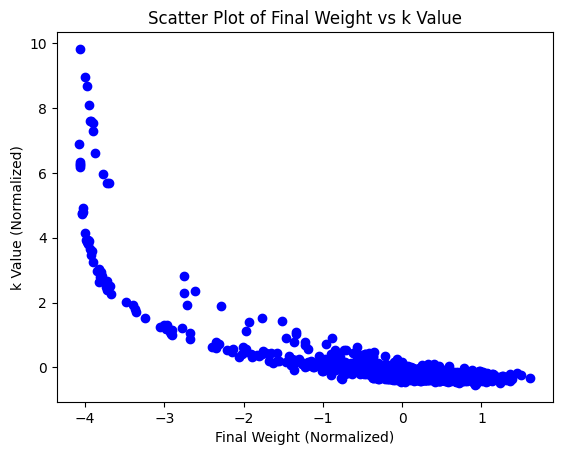

In [50]:
plt.scatter(selected_data['final_wt'], selected_data['k_value'], color='blue')
plt.xlabel('Final Weight (Normalized)')
plt.ylabel('k Value (Normalized)')
plt.title('Scatter Plot of Final Weight vs k Value')
plt.show()


The visualization of the data above shows a logarithmic relationship between `k_value` and `final_wt`. This indicates that a basic linear regression may not be effective. In order to explore this possibility, we will compare the results of a linear regression model trained on the original data and a linear regression model trained on the data after a logarithmic tranformation.

### Splitting the Data

The dataset is split into training and testing sets to evaluate the performance of our basic linear regression model.


In [51]:
# Split the data into features (X) and target (y)
X = selected_data[['final_wt']]
y = selected_data['k_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression Model Initialization and Training

In this section, we train a linear regression model on our training data. After training, we use the model to predict `k_value` from `final_wt` in the testing set. We then evaluate our model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²), which provide insights into the accuracy and goodness of fit of our model. For this analysis, we employ a linear regression model from the sklearn package.

### What is Linear Regression?

Linear Regression is a fundamental statistical method used in machine learning for predicting a quantitative response. It's a method that models the relationship between a scalar dependent variable \( y \) and one or more explanatory variables (or independent variables) denoted \( X \). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

The formula for a linear regression line is given by:

$$ y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon $$

where \( \beta_0 \) is the y-intercept, \( \beta_1, \beta_2, ..., \beta_n \) are the coefficients, \( X_1, X_2, ..., X_n \) are the variables, and \( \epsilon \) is the error term.

### Training Linear Regression

The sklearn library's `LinearRegression` function will be used to fit our model. This function will estimate the coefficients \( \beta \) of the regression equation with the goal of minimizing the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Here is the code snippet to initialize and train our linear regression model:



In [60]:
# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.5742211656839801

An R-squared value of 0.574 is moderate, suggesting that while there is some linear relationship, the model may not capture all the complexities or patterns in the data. The visualization below provides another view of this result.

## Visualizing the Regression Model

Visualization plays a key role in understanding the results of our analysis. Here, we plot the actual data points from the testing set and superimpose the regression line predicted by our model. This plot will help us visually assess how well our linear regression model has captured the underlying relationship between `final_wt` and `k_value`.


c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


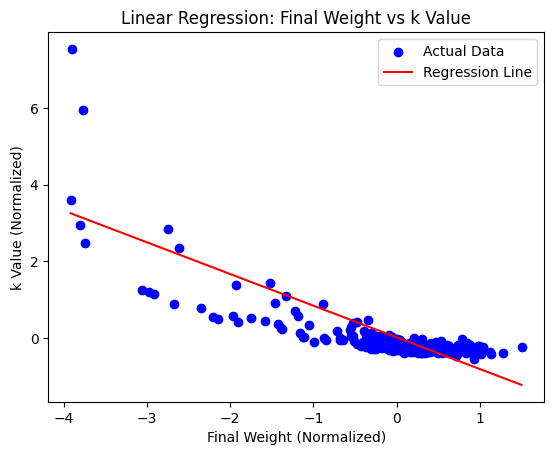

In [53]:
# Plotting test data points and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = lin_reg.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('Final Weight (Normalized)')
plt.ylabel('k Value (Normalized)')
plt.title('Linear Regression: Final Weight vs k Value')
plt.legend()
plt.show()

This visualization confirms the result that a somewhat linear relationship exists between `final_wt` and `k_value` . However, let's look at how a linear regression model performs when a logarithmic tranformation is applied to the data.

## Normalizing and Transforming Data

Given the logarithmic relationship observed in the initial data visualization, we apply a log transformation to the `k_value` variable to see if this linearizes the relationship, improving the fit of our linear regression model.

### Handling Invalid Data Values

Before applying a logarithmic transformation to the `k_value` feature, we must ensure that there are no non-positive values, as the logarithm of zero or negative numbers is undefined. We checked the data and found some instances of zero or negative `k_value`. These were handled by removing such entries (or replacing zeros with a small positive number) to ensure our dataset is suitable for transformation.

### Applying Log Transformation

The logarithmic transformation is applied to `k_value` to linearize its relationship with `final_wt`, enhancing the performance of our linear regression model. This transformation helps in dealing with exponential data scaling and makes our model better suited for prediction.

      final_wt   k_value
805   0.535681 -0.406082
806   0.888897 -0.447452
807   0.235381 -0.406693
808   0.618029 -0.320144
809   0.716832 -0.413817
...        ...       ...
2185  0.186677 -0.364226
2186  0.386462 -0.321259
2187  1.075238 -0.344965
2188  0.407006 -0.315277
2189  0.138611 -0.343730

[1163 rows x 2 columns]


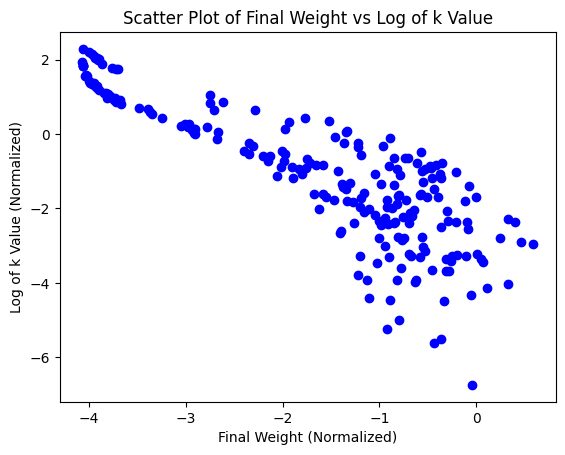

In [54]:
# Check for zero or negative values in 'k_value'
print(selected_data[selected_data['k_value'] <= 0])

# Removing rows where 'k_value' is zero or negative
selected_data = selected_data[selected_data['k_value'] > 0]

# Or, replacing zero with a small positive number, e.g., the smallest positive value in 'k_value'
min_positive = selected_data[selected_data['k_value'] > 0]['k_value'].min()
selected_data['k_value'] = selected_data['k_value'].replace(0, min_positive)

# Applying log transformation to the 'k_value' feature
selected_data['log_k_value'] = np.log(selected_data['k_value'])

# Plot to check the distribution after transformation
plt.scatter(selected_data['final_wt'], selected_data['log_k_value'], color='blue')
plt.xlabel('Final Weight (Normalized)')
plt.ylabel('Log of k Value (Normalized)')
plt.title('Scatter Plot of Final Weight vs Log of k Value')
plt.show()

This visualization allows us to see that a more linear relationship exists between `log_k_value` and `final_wt` than betweeen the original features. Let's build a new linear regression model to confirm this hypothesis.

## Building a Linear Regression Model on Transformed Data

Now, we will build our linear regression model using the `final_wt` feature to predict the transformed `log_k_value`.


In [57]:
# Splitting the data into features (X) and target (y) after transformation
X_transformed = selected_data[['final_wt']]
y_transformed = selected_data['log_k_value']

# Splitting the dataset into training and testing sets
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Training the Linear Regression model on transformed data
lin_reg_trans = LinearRegression()
lin_reg_trans.fit(X_train_trans, y_train_trans)

# Predicting on the test set
y_pred_trans = lin_reg_trans.predict(X_test_trans)

# Evaluating the model
mse_trans = mean_squared_error(y_test_trans, y_pred_trans)
r2_trans = r2_score(y_test_trans, y_pred_trans)
r2_trans

0.8465827023264357

After applying a logarithmic transformation, the R-squared value improved significantly to approximately 0.846. This means the transformed model now explains about 84.6% of the variability in the dependent variable.

## Visualizing the Regression Model

Here, we plot the actual data points from the testing set with our transformation applied and superimpose the regression line predicted by our model. This plot will help us visually assess how well our linear regression model represents the actual relationship between `final_wt` and `log_k_value`.


c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


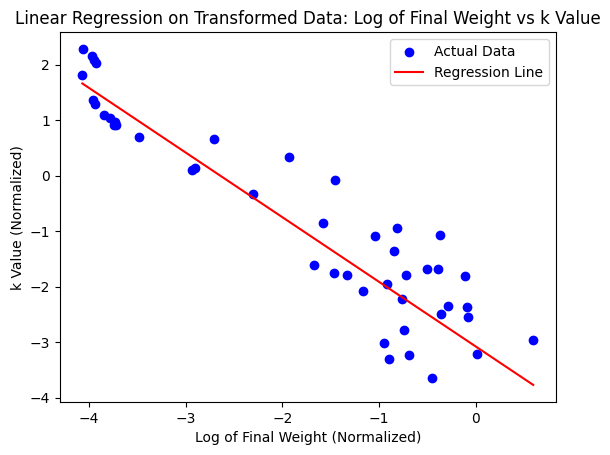

In [56]:
# Plotting test data points and the regression line for transformed data
plt.scatter(X_test_trans, y_test_trans, color='blue', label='Actual Data')
x_line_trans = np.linspace(X_test_trans.min(), X_test_trans.max(), 100).reshape(-1, 1)
y_line_trans = lin_reg_trans.predict(x_line_trans)
plt.plot(x_line_trans, y_line_trans, color='red', label='Regression Line')
plt.xlabel('Log of Final Weight (Normalized)')
plt.ylabel('k Value (Normalized)')
plt.title('Linear Regression on Transformed Data: Log of Final Weight vs k Value')
plt.legend()
plt.show()

## Conclusion

The analysis conducted in this notebook explored the relationship between `final_wt` and `k_value` using linear regression models. Initially, a straightforward linear regression model was built, which resulted in an R-squared of 0.574. This indicated that approximately 57.4% of the variability in `k_value` was explained by `final_wt`, suggesting a moderate fit.

To improve the model's performance, a logarithmic transformation was applied to the `k_value` feature. This transformation was motivated by the observed non-linear patterns in the data during exploratory analysis. The transformed model showed a significant improvement, with an R-squared of 0.846. This improvement suggests that the transformed model now captures a much greater proportion of the variability in `k_value`, explaining approximately 84.6% of its variations.

The results clearly demonstrate the effectiveness of data transformation in enhancing model performance. The logarithmic transformation helped in stabilizing variance and normalizing the data distribution, which aligned the data more closely with the linear model assumptions.

Overall, this analysis underscores the importance of understanding the underlying data distribution and applying appropriate preprocessing techniques to maximize the predictive performance of linear regression models.


